50
   caseno  SepalLength  SepalWidth  PetalLength  PetalWidth Species
0       1          5.1         3.5          1.4         0.2  setosa
1       2          4.9         3.0          1.4         0.2  setosa
2       3          4.7         3.2          1.3         0.2  setosa
3       4          4.6         3.1          1.5         0.2  setosa
4       5          5.0         3.6          1.4         0.2  setosa
5       6          5.4         3.9          1.7         0.4  setosa
6       7          4.6         3.4          1.4         0.3  setosa
7       8          5.0         3.4          1.5         0.2  setosa
8       9          4.4         2.9          1.4         0.2  setosa
9      10          4.9         3.1          1.5         0.1  setosa
10     11          5.4         3.7          1.5         0.2  setosa
11     12          4.8         3.4          1.6         0.2  setosa
12     13          4.8         3.0          1.4         0.1  setosa
13     14          4.3         3.0          1

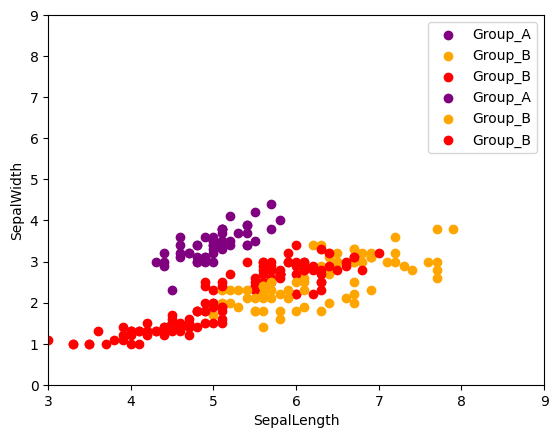

In [139]:
from tables.tests.common import print_heavy
from google.colab import drive
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random

# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

csv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV/iris_data.csv")

label=csv[['caseno','SepalLength','SepalWidth','PetalLength', 'PetalWidth','Species']]
temp1 = [[0 for j in range(4)] for i in range(3)]
temp2 = [[0 for j in range(4)] for i in range(3)]

max_temp=0;
label_sample=random.sample(range(0,150),3)  #무작위 랜덤 3개 정수 -> 샘플용 데이터 인덱스 번호 추출
#label_sample=[8,60,130]

Group_avg=pd.DataFrame(columns=label.columns[1:5])
Group_A=pd.DataFrame(columns=label.columns)
Group_B=pd.DataFrame(columns=label.columns)
Group_C=pd.DataFrame(columns=label.columns)

Group=[Group_A,Group_B,Group_C]
#처음 정한 기준값 저장 및 인덱스 번호 재설정
for i in range(0,3):
  Group_avg=pd.concat([Group_avg,label.loc[[label_sample[i]],['SepalLength','SepalWidth','PetalLength', 'PetalWidth']]])
Group_avg=Group_avg.reset_index(drop=True)

a=[0 for i in range(3)]

while True:
  for i in range(0,150):
    for j in range(0,3):
      a[j]=pow(Group_avg.sub(label.loc[i][1:5]),2).iloc[j].sum()
    max_temp=a.index(min(a))                                    #가장 작은 값의 인덱스에 맞게 클러스터링
    Group[max_temp]=pd.concat([Group[max_temp],label.iloc[[i]]])#저장 
  #새로운 평균값 구해서 추출 및 저장
  for j in range(0,3):
    Group_avg.loc[j,:]=Group[j].iloc[:,1:5].sum()/len(Group[j])
    
  temp2=temp1       
  temp1=Group_avg[['SepalLength','SepalWidth','PetalLength', 'PetalWidth']].values.tolist()
  if temp2==temp1:
    break
  else:
    for j in range(0,3):
      Group[j].drop(Group[j].index[:], inplace=True)
for i in range(0,3):
  print(len(Group[i]))
  print(Group[i])
  print('\n')

'''
#그래프 영역
plt.scatter( Group[0]['SepalLength'], Group[0]['SepalWidth'], label = "Group_A",color = 'purple')
plt.scatter( Group[1]['SepalLength'], Group[1]['SepalWidth'], label = "Group_B", color = 'orange')
plt.scatter( Group[2]['SepalLength'], Group[2]['SepalWidth'], label = "Group_B", color = 'red')

plt.scatter( Group[0]['PetalLength'], Group[0]['PetalWidth'], label = "Group_A",color = 'purple')
plt.scatter( Group[1]['PetalLength'], Group[1]['PetalWidth'], label = "Group_B", color = 'orange')
plt.scatter( Group[2]['PetalLength'], Group[2]['PetalWidth'], label = "Group_B", color = 'red')
  
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

plt.xlim([3, 9])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 9])     # Y축의 범위: [ymin, ymax]

plt.show()
'''